In [2]:
import pandas as pd
import numpy as np
import tweepy
import json
import requests
import seaborn as sns
import re
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')

In [3]:
twitter_archive=pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image_predictions=requests.get(url)
with open ('image_predictions.tsv', mode='wb') as file:
    file.write(image_predictions.content)

In [5]:
image_predictions=pd.read_csv('image_predictions.tsv', sep='\t')

In [11]:
consumer_key='6vhBuzdwIrUmCwXP3IyWpJITQ'
consumer_secret='z4KKw7x1qO5DMxVcP6JHC8hge6DW3ItPv9J00cps2ktKlrmuVp'
access_token='2182193300-kS53HxdjOuGeeAFkS87k7zqWXSI73KDPQF5qezs'
access_secret='Lddsj8ErVeukNEV23cqlBHF6lp8H1eO72ZabqLVRiKoeh'

auth=tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api=tweepy.API(auth, parser=tweepy.parsers.JSONParser(), wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [ ]:
for tweet_id in df_twitter_archive.tweet_id:
    try:
        tweet_json = api.get_status(tweet_id, tweet_mode = 'extented')
        with open('tweet_json.txt', mode='a') as file:
            json.dump(tweet_json, file)
            file.write('\n')
    except Exception as e:
        print(str(tweet_id) + ': ' + str(e))

In [6]:
lists = [] 

with open('tweet_json.txt') as file:
    lines=file.read().splitlines()
    for line in lines:
        data = json.loads(line)
        row = {
            'tweet_id'      : data['id'],
            'retweet_count' : data['retweet_count'],
            'favorite_count': data['favorite_count']
        }
        lists.append(row)
tweet_json = pd.DataFrame(lists,columns=['tweet_id','retweet_count','favorite_count']) 

In [7]:
tweet_json.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8369,38204
1,892177421306343426,6179,32755
2,891815181378084864,4090,24668
3,891689557279858688,8504,41529
4,891327558926688256,9210,39721


## Assessing

In [8]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [10]:
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [11]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [12]:
sum(twitter_archive.duplicated())

0

In [13]:
twitter_archive.tweet_id.nunique()

2356

In [14]:
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [15]:
twitter_archive.name.value_counts()

None          745
a              55
Charlie        12
Oliver         11
Lucy           11
Cooper         11
Tucker         10
Penny          10
Lola           10
Winston         9
Bo              9
the             8
Sadie           8
Bailey          7
an              7
Daisy           7
Buddy           7
Toby            7
Koda            6
Oscar           6
Jax             6
Stanley         6
Milo            6
Jack            6
Scout           6
Bella           6
Dave            6
Leo             6
Rusty           6
George          5
             ... 
Shelby          1
Mike            1
Henry           1
Miguel          1
Jersey          1
Ralpher         1
Dante           1
Erik            1
Tino            1
incredibly      1
Sparky          1
Fido            1
Nimbus          1
Crawford        1
Pancake         1
Gin             1
Gustav          1
Jay             1
Siba            1
Laela           1
Cannon          1
Arya            1
Pip             1
Roscoe          1
Peanut    

In [16]:
twitter_archive[['text', 'name']]

,text,name
0,This is Phineas. He's a mystical boy. Only eve...,Phineas
1,This is Tilly. She's just checking pup on you....,Tilly
2,This is Archie. He is a rare Norwegian Pouncin...,Archie
3,This is Darla. She commenced a snooze mid meal...,Darla
4,This is Franklin. He would like you to stop ca...,Franklin
5,Here we have a majestic great white breaching ...,None
6,Meet Jax. He enjoys ice cream so much he gets ...,Jax
7,When you watch your owner call another dog a g...,None
8,This is Zoey. She doesn't want to be one of th...,Zoey
9,This is Cassie. She is a college pup. Studying...,Cassie


In [17]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [18]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [19]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [21]:
image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [22]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [23]:
image_predictions.duplicated().sum()

0

In [24]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3229 entries, 0 to 3228
Data columns (total 3 columns):
tweet_id          3229 non-null int64
retweet_count     3229 non-null int64
favorite_count    3229 non-null int64
dtypes: int64(3)
memory usage: 75.8 KB


In [25]:
tweet_json.duplicated().sum()

20

In [26]:
tweet_json

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8369,38204
1,892177421306343426,6179,32755
2,891815181378084864,4090,24668
3,891689557279858688,8504,41529
4,891327558926688256,9210,39721
5,891087950875897856,3065,19940
6,890971913173991426,2031,11668
7,890729181411237888,18571,64463
8,890609185150312448,4206,27400
9,890240255349198849,7271,31440


In [27]:
tweet_json.describe()

,tweet_id,retweet_count,favorite_count
count,3.229000e+03,3229.000000,3229.000000
mean,7.636148e+17,3557.493961,9806.860328
std,7.048904e+16,5290.487180,13577.110671
min,6.660209e+17,0.000000,0.000000
25%,6.892753e+17,772.000000,1546.000000
50%,7.704143e+17,2034.000000,5064.000000
75%,8.228729e+17,4231.000000,13220.000000
max,8.924206e+17,84070.000000,164906.000000


## Quality
>01. Some columns like  
**in_reply_to_status_id**         (2278) 
**in_reply_to_user_id**           (2278)
**retweeted_status_id**           (2175)
**retweeted_status_user_id**      (2175) and 
**retweeted_status_timestamp**    (2175) have very large number of null values in them.
 It is better to drop them. 
>02. Column **timestamp**, **rating_denominator** and **rating_numerator** have incorrect datatypes. 
>03. Sources are not mentioned properly in the **source** column. 
>04. A lot of dog names are like "None" and "a". These aren't the names of dogs in real life, usually.
>05. The **rating_denominator** and **rating_numerator** columns have some invalid values. 
>06. We can extract the gender of the dog from the **text** column.
>07. Replace underscores from the dog breeds given in the columns **p1**, **p2**, **p3** in image_predictions table. 
>08. **tweet_id** in all the three dataframes is in int data type. It is better that it should be in string datatype. 
>09. tweet_json dataframe has 20 duplicate rows. 

## Tidiness 
>01. Keep only the true prediction column about the dogs instead of every prediction column.
>02. Combine each dog stage column into one column.
>03. The **rating_denominator** and **rating_numerator** columns can be converted into a single **rating** column.
>04. All the three dataframes can be merged into a single dataframe **df_clean**.

## Cleaning for Quality Issues

In [28]:
twitter_archive_copy=twitter_archive.copy()

In [29]:
image_predictions_copy=image_predictions.copy()

In [30]:
tweet_json_copy=tweet_json.copy()

### 1. Drop columns with null values 
#### Define
There are columns with too many null values. It is better to drop them using .drop()

#### Code

In [31]:
twitter_archive_copy.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

#### Test

In [32]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: int64(3), object(9)
memory usage: 221.0+ KB


### 2. Correct the Data Type.

#### Define
The **timestamp**, **rating_denominator**, **rating_numerator** columns in the dataframe twitter_archive are not having the correct data type. Using pd.to_datetime(), and .astype() we can change them to the correct datatype. **tweet_id** in all the dataframes is in int datatype. It is converted to string using .to_string(). 

#### Code

In [33]:
twitter_archive_copy.timestamp=pd.to_datetime(twitter_archive_copy.timestamp)
twitter_archive_copy.rating_denominator = twitter_archive_copy.rating_denominator.astype('float')
twitter_archive_copy.rating_numerator = twitter_archive_copy.rating_numerator.astype('float')

#### Test

In [34]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null float64
rating_denominator    2356 non-null float64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(8)
memory usage: 221.0+ KB


### 3. Extract the source 

#### Define
Extract the proper source of the tweet using the regular expression and using a created function. Since there are only 4 unique sources we can convert the source to a categorical variable. Use apply() function of the pandas library to apply the function to the entire column. 

#### Code

In [35]:
def extract_source(row):
    try:
        src = re.search('>(.+)</a>', row['source']).group(1)
    except AttributeError:
        src = ''
    return src

In [36]:
twitter_archive_copy['source'] = twitter_archive_copy.apply(extract_source, axis=1)
twitter_archive_copy['source'] = twitter_archive_copy.source.astype('category')

#### Test

In [37]:
twitter_archive_copy['source'].value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

In [38]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null datetime64[ns]
source                2356 non-null category
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null float64
rating_denominator    2356 non-null float64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: category(1), datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 205.0+ KB


### 4. Extract the gender from the text column

#### Define
Create a function gender() to extract the gender of the dog from the description given about the dog in the **text** column. Then, converting the gender into categorical data type.

#### Code

In [39]:
def gender(i):
    if 'He' in i['text']:
        gender = 'Male'
    
    elif 'She' in i['text']:
        gender = 'Female'
        
    else:
        gender = 'Not mentioned'
        
    return gender

In [40]:
twitter_archive_copy['gender']=twitter_archive_copy.apply(gender, axis=1)

In [41]:
twitter_archive_copy.gender=twitter_archive_copy.gender.astype('category')

In [42]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null datetime64[ns]
source                2356 non-null category
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null float64
rating_denominator    2356 non-null float64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
gender                2356 non-null category
dtypes: category(2), datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 207.4+ KB


In [43]:
twitter_archive_copy['gender'].value_counts()

Male             1144
Not mentioned     893
Female            319
Name: gender, dtype: int64

### 5. Correct the names of the dogs

#### Define
There are a lot of names of the dogs in the **name** column that aren't the appropriate names, I suppose. Using .replace(), it is better to replace them with the correct names. 

#### Code

In [44]:
twitter_archive_copy['name'].unique().tolist()

['Phineas',
 'Tilly',
 'Archie',
 'Darla',
 'Franklin',
 'None',
 'Jax',
 'Zoey',
 'Cassie',
 'Koda',
 'Bruno',
 'Ted',
 'Stuart',
 'Oliver',
 'Jim',
 'Zeke',
 'Ralphus',
 'Canela',
 'Gerald',
 'Jeffrey',
 'such',
 'Maya',
 'Mingus',
 'Derek',
 'Roscoe',
 'Waffles',
 'Jimbo',
 'Maisey',
 'Lilly',
 'Earl',
 'Lola',
 'Kevin',
 'Yogi',
 'Noah',
 'Bella',
 'Grizzwald',
 'Rusty',
 'Gus',
 'Stanley',
 'Alfy',
 'Koko',
 'Rey',
 'Gary',
 'a',
 'Elliot',
 'Louis',
 'Jesse',
 'Romeo',
 'Bailey',
 'Duddles',
 'Jack',
 'Emmy',
 'Steven',
 'Beau',
 'Snoopy',
 'Shadow',
 'Terrance',
 'Aja',
 'Penny',
 'Dante',
 'Nelly',
 'Ginger',
 'Benedict',
 'Venti',
 'Goose',
 'Nugget',
 'Cash',
 'Coco',
 'Jed',
 'Sebastian',
 'Walter',
 'Sierra',
 'Monkey',
 'Harry',
 'Kody',
 'Lassie',
 'Rover',
 'Napolean',
 'Dawn',
 'Boomer',
 'Cody',
 'Rumble',
 'Clifford',
 'quite',
 'Dewey',
 'Scout',
 'Gizmo',
 'Cooper',
 'Harold',
 'Shikha',
 'Jamesy',
 'Lili',
 'Sammy',
 'Meatball',
 'Paisley',
 'Albus',
 'Neptune',
 '

In [45]:
correct_names = {"a": "None", 'the': "None", 'an':'None', 'my':'None'}
twitter_archive_copy['name'].replace(correct_names, inplace=True)

#### Test

In [46]:
twitter_archive_copy['name'].value_counts()

None          816
Charlie        12
Lucy           11
Oliver         11
Cooper         11
Penny          10
Lola           10
Tucker         10
Winston         9
Bo              9
Sadie           8
Daisy           7
Toby            7
Bailey          7
Buddy           7
Stanley         6
Jax             6
Rusty           6
Koda            6
Leo             6
Dave            6
Bella           6
Scout           6
Milo            6
Oscar           6
Jack            6
Finn            5
very            5
Gus             5
Louis           5
             ... 
Shelby          1
Mike            1
Henry           1
Miguel          1
Jersey          1
Ralpher         1
Dante           1
Erik            1
Tino            1
incredibly      1
Sparky          1
Fido            1
Nimbus          1
Crawford        1
Pancake         1
Gin             1
Gustav          1
Jay             1
Siba            1
Laela           1
Cannon          1
Arya            1
Pip             1
Roscoe          1
Peanut    

### 6. Replace _ from the breed names

#### Define
The dog breed in the columns **p1**, **p2**, **p3**  have underscores in between the words. Replace them using .str.replace() functions. 

#### Code

In [47]:
image_predictions_copy.p1 = image_predictions_copy.p1.str.replace("_", " ")
image_predictions_copy.p2 = image_predictions_copy.p2.str.replace("_", " ")
image_predictions_copy.p3 = image_predictions_copy.p3.str.replace("_", " ")

#### Test

In [48]:
image_predictions_copy.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### 7. Drop duplicate rows 

#### Define
Drop the duplicate rows of the tweet_json_copy dataframe using .drop_duplicates().

#### Code

In [49]:
tweet_json_copy = tweet_json_copy.drop_duplicates()

#### Test

In [50]:
tweet_json_copy.duplicated().sum()

0

## Cleaning for Tidiness Issues

### 1. Keep only the true prediction column about the dog.

#### Define
We have 3 columns for dog breed prediction (**p1**, **p2**, **p3**). 3 columns for prediction confidence level (**p1_conf**, **p2_conf**, **p3_conf**). 3 columns for whether the predicted breed is a type of breed or not (**p1_dog**, **p2_dog**, **p3_dog**). Instead of all these columns, we can have only column for the dog breed by checking the confidence levels of the predictions and the prediction with the highest confidence will be the breed of the dog. 

In [51]:
breed = []
confidence_level = []

def breed_and_confidence(row):
    if row['p1_dog'] == True:
        breed.append(row['p1'])
        confidence_level.append(row['p1_conf'])
    elif row['p2_dog'] == True:
        breed.append(row['p2'])
        confidence_level.append(row['p2_conf'])
    elif row['p3_dog'] == True:
        breed.append(row['p3'])
        confidence_level.append(row['p3_conf'])
    else:
        breed.append('Not identified')
        confidence_level.append(np.nan)
        

image_predictions_copy.apply(breed_and_confidence, axis=1)
image_predictions_copy['breed'] = pd.Series(breed)
image_predictions_copy['confidence'] = pd.Series(confidence_level)
image_predictions_copy.drop(['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'], axis=1, inplace=True)

In [52]:
image_predictions_copy.head()

,tweet_id,jpg_url,img_num,breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311


### 2. Create a single column for dog stages instead of four.

#### Define
The columns indicating the dog stages can be combined into a single column. We have to use the text provided about the dogs to get the dog stages in a single column and then drop the other stage columns.

#### Code

In [53]:
def dog_stage(i):
    if 'doggo' in i['text'].lower():
        stage = 'doggo'
    elif 'floof' in i['text'].lower():
        stage = 'floofer'
    elif 'pupper' in i['text'].lower():
        stage = 'pupper'
    elif 'puppo' in i['text'].lower():
        stage = 'puppo'
    else:
        stage = 'Not Specified'
    return stage

In [54]:
twitter_archive_copy['stage'] = twitter_archive_copy.apply(dog_stage, axis=1)
twitter_archive_copy['stage'] = twitter_archive_copy.stage.astype('category')

In [55]:
twitter_archive_copy = twitter_archive_copy.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

#### Test

In [56]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null datetime64[ns]
source                2356 non-null category
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null float64
rating_denominator    2356 non-null float64
name                  2356 non-null object
gender                2356 non-null category
stage                 2356 non-null category
dtypes: category(3), datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 136.3+ KB


### 3. Merge the dataframes

#### Define
All the three dataframes can be merged together to form a single dataframe using pd.merge().

#### Code

In [57]:
df_clean = pd.merge(twitter_archive_copy, tweet_json_copy,
                        how = 'inner', on = 'tweet_id')
df_clean = pd.merge(df_clean, image_predictions_copy,
                        how = 'inner', on = 'tweet_id')

In [58]:
df_clean.tweet_id = df_clean.tweet_id.astype(str)

#### Test

In [59]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2788 entries, 0 to 2787
Data columns (total 16 columns):
tweet_id              2788 non-null object
timestamp             2788 non-null datetime64[ns]
source                2788 non-null category
text                  2788 non-null object
expanded_urls         2788 non-null object
rating_numerator      2788 non-null float64
rating_denominator    2788 non-null float64
name                  2788 non-null object
gender                2788 non-null category
stage                 2788 non-null category
retweet_count         2788 non-null int64
favorite_count        2788 non-null int64
jpg_url               2788 non-null object
img_num               2788 non-null int64
breed                 2788 non-null object
confidence            2388 non-null float64
dtypes: category(3), datetime64[ns](1), float64(3), int64(3), object(6)
memory usage: 313.6+ KB


In [60]:
df_clean.head(20)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,gender,stage,retweet_count,favorite_count,jpg_url,img_num,breed,confidence
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,Male,Not Specified,8369,38204,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Not identified,NaN
1,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,Male,Not Specified,8349,38160,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Not identified,NaN
2,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,Female,Not Specified,6179,32755,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581
3,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,Female,Not Specified,6171,32728,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581
4,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,Male,Not Specified,4090,24668,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012
5,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,Male,Not Specified,4082,24640,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012
6,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,Female,Not Specified,8504,41529,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador retriever,0.168086
7,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,Female,Not Specified,8495,41499,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador retriever,0.168086
8,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,Male,Not Specified,9210,39721,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712
9,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,Male,Not Specified,9185,39671,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712


### 4. Combine the rating_denominator and rating_numerator columns to form 1 column

#### Define
The **rating_denominator** and **rating_numerator** columns are combined to for **ratings** column and are then dropped from the dataframe. The ratings are categorised and stored in the **rating_levels** column using pd.cut(). 

#### Code

In [61]:
df_clean['ratings'] = df_clean.rating_numerator/df_clean.rating_denominator
df_clean['rating_levels'] = pd.cut(df_clean.ratings, bins = [0.0, np.percentile(df_clean.ratings,25), np.percentile(df_clean.ratings,50), np.percentile(df_clean.ratings,75), np.max(df_clean.ratings)],labels=['Low','Below_average','Above_average','High'])

In [62]:
df_clean.drop(['rating_numerator','rating_denominator'], axis=1, inplace=True)

#### Test

In [63]:
df_clean.head(10)

,tweet_id,timestamp,source,text,expanded_urls,name,gender,stage,retweet_count,favorite_count,jpg_url,img_num,breed,confidence,ratings,rating_levels
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,Male,Not Specified,8369,38204,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Not identified,NaN,1.3,High
1,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,Male,Not Specified,8349,38160,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Not identified,NaN,1.3,High
2,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,Female,Not Specified,6179,32755,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,1.3,High
3,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,Female,Not Specified,6171,32728,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,1.3,High
4,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,Male,Not Specified,4090,24668,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,1.2,Above_average
5,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,Male,Not Specified,4082,24640,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,1.2,Above_average
6,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,Female,Not Specified,8504,41529,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador retriever,0.168086,1.3,High
7,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,Female,Not Specified,8495,41499,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador retriever,0.168086,1.3,High
8,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,Male,Not Specified,9210,39721,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,1.2,Above_average
9,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,Male,Not Specified,9185,39671,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,1.2,Above_average


## Quality issues in the new dataframe

#### 1. Rows with unspecified breeds and names.

#### Define
Remove the rows that don't have the breeds and names specified from the dataframe **df_clean**.

#### Code

In [64]:
df_clean=df_clean[df_clean['name']!='None'] 

In [65]:
df_clean.name.value_counts() 

Charlie      16
Penny        16
Tucker       16
Cooper       14
Lucy         14
Bo           14
Oliver       13
Winston      12
Daisy        11
Lola         11
Dave         10
Stanley      10
Rusty        10
Toby         10
Scout        10
Sadie        10
Bailey       10
Koda          9
Alfie         8
Milo          8
Loki          8
Leo           8
Bella         8
Bear          7
Sunny         7
Buddy         7
Clark         7
Jax           7
Oscar         7
Winnie        7
             ..
Hector        1
Biden         1
Livvie        1
Beemo         1
Storkson      1
Ashleigh      1
Tug           1
Mona          1
Gilbert       1
Jiminus       1
Kaiya         1
Amélie        1
Caryl         1
Fynn          1
Edd           1
Ralf          1
Ruffles       1
Bookstore     1
Tedrick       1
Suki          1
Bilbo         1
Finnegus      1
Spark         1
Mike          1
Tommy         1
Jackie        1
Emmie         1
Maks          1
Arnold        1
Opie          1
Name: name, Length: 931,

In [66]:
df_clean=df_clean.query('breed!="Not identified"') 

#### Test

In [67]:
df_clean.breed.value_counts()

golden retriever                  195
Labrador retriever                116
Pembroke                          102
Chihuahua                          87
chow                               63
pug                                58
toy poodle                         52
French bulldog                     41
Samoyed                            40
malamute                           39
Pomeranian                         36
cocker spaniel                     34
Chesapeake Bay retriever           31
miniature pinscher                 29
Cardigan                           29
Staffordshire bullterrier          28
Siberian husky                     27
German shepherd                    25
Eskimo dog                         21
Old English sheepdog               20
beagle                             20
schipperke                         19
basset                             19
Shetland sheepdog                  18
kelpie                             17
Shih-Tzu                           17
Pekinese    

In [68]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1785 entries, 2 to 2757
Data columns (total 16 columns):
tweet_id          1785 non-null object
timestamp         1785 non-null datetime64[ns]
source            1785 non-null category
text              1785 non-null object
expanded_urls     1785 non-null object
name              1785 non-null object
gender            1785 non-null category
stage             1785 non-null category
retweet_count     1785 non-null int64
favorite_count    1785 non-null int64
jpg_url           1785 non-null object
img_num           1785 non-null int64
breed             1785 non-null object
confidence        1785 non-null float64
ratings           1785 non-null float64
rating_levels     1785 non-null category
dtypes: category(4), datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 188.9+ KB


## Analysis

In [69]:
def group_bymax(x,y): 
    a=df_clean.groupby(x)[y].max().sort_values(ascending=False)[:20]
    return(a)

In [70]:
def graph(a, xlabel, ylabel):  #defining another funtion graph() and giving a, xlabel and ylabel as attributes. 
    b=a.plot(kind='bar', figsize=(20,8))  
    plt.xlabel(xlabel, fontsize=20)
    plt.ylabel(ylabel, fontsize=20) 
    plt.xticks(rotation=70, fontsize=15)
    plt.show()

### 1. Which tweet id has the max retweets?

In [71]:
x='tweet_id'
y='retweet_count'
max_retweet_ids = group_bymax(x,y)
max_retweet_ids

tweet_id
807106840509214720    61287
879415818425184262    43636
819015337530290176    40230
819004803107983360    40230
866450705531457537    35623
676219687039057920    32840
859196978902773760    30981
817827839487737858    29804
870374049280663552    26224
679462823135686656    20215
877736472329191424    18863
885311592912609280    18287
830583320585068544    18287
884925521741709313    18008
682962037429899265    17945
887473957103951883    17899
829011960981237760    17642
667152164079423490    17384
841833993020538882    16434
817423860136083457    16434
Name: retweet_count, dtype: int64

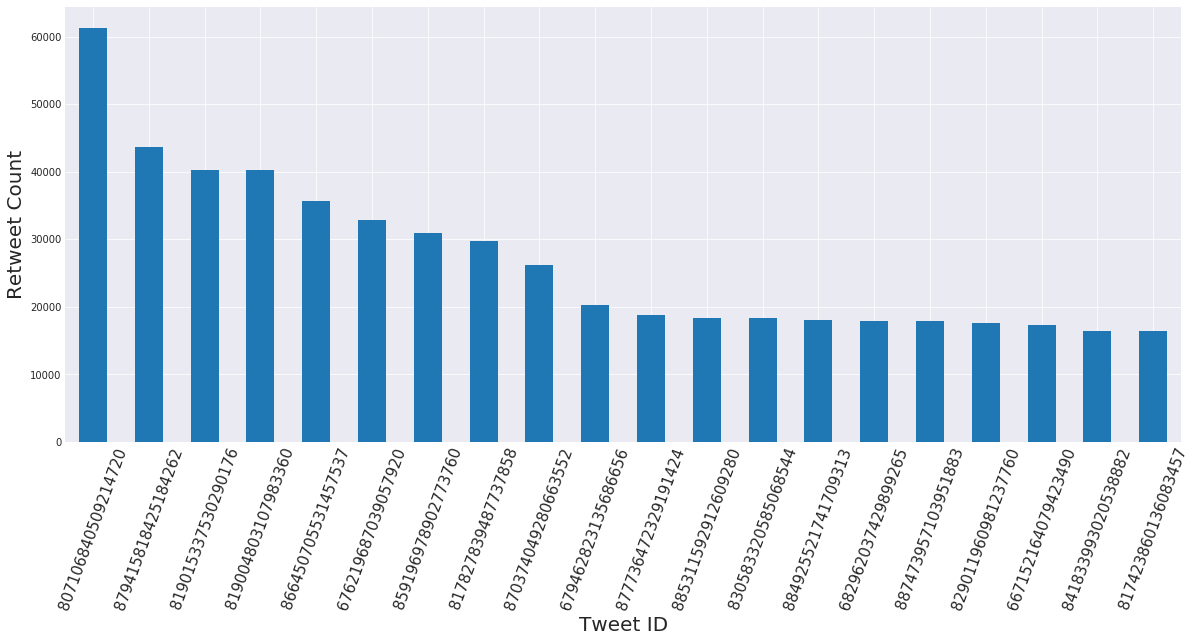

In [72]:
xlabel='Tweet ID'
ylabel='Retweet Count'
graph(max_retweet_ids, xlabel, ylabel)

Tweet ID **807106840509214720** has the highest **Retweet Count** i.e, 61287.

### 2. Which tweet id has the max likes (or favorite count)?

In [73]:
x='tweet_id'
y='favorite_count'
max_favorite_count = group_bymax(x,y)
max_favorite_count

tweet_id
807106840509214720    127590
866450705531457537    122462
879415818425184262    104449
819004803107983360     92305
859196978902773760     91079
870374049280663552     82224
877736472329191424     78775
676219687039057920     77781
884925521741709313     76384
830583320585068544     70861
887473957103951883     68087
868880397819494401     65461
829011960981237760     56173
817827839487737858     55457
866334964761202691     52700
881666595344535552     49900
667152164079423490     48190
846514051647705089     46522
883482846933004288     45274
882268110199369728     44336
Name: favorite_count, dtype: int64

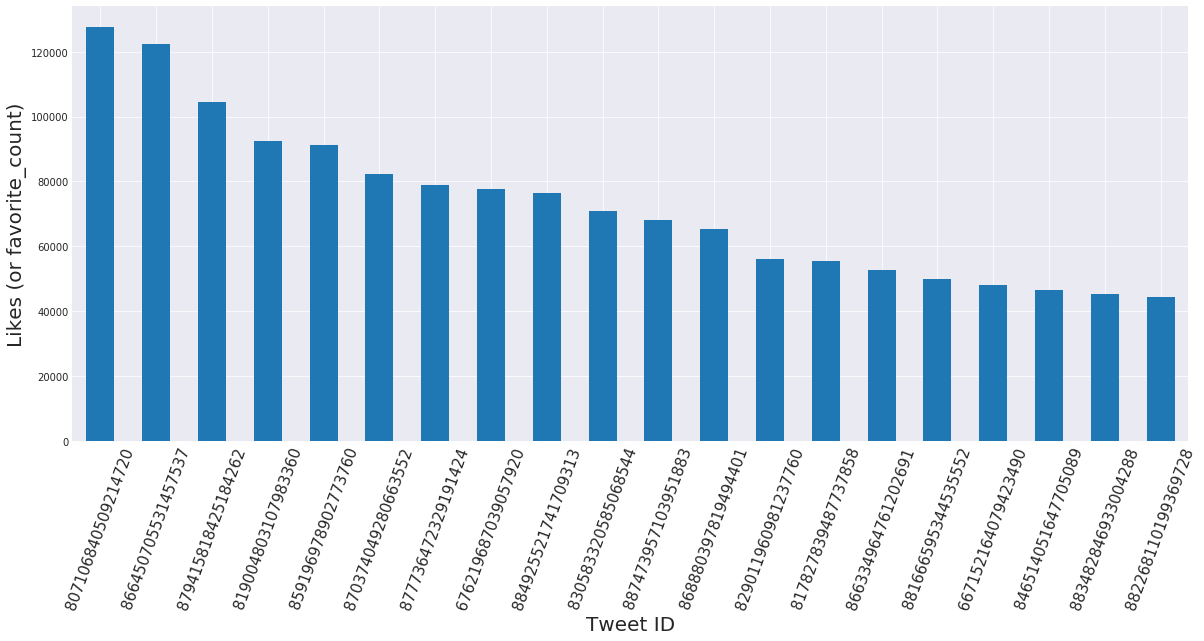

In [74]:
xlabel='Tweet ID'
ylabel='Likes (or favorite_count)'
graph(max_favorite_count, xlabel, ylabel)

Tweet ID **807106840509214720** has the highest **Likes (or favorite_count)** 127590. 

### 3. Most frequent source

In [75]:
frequent_source=df_clean.source.value_counts()
frequent_source

Twitter for iPhone     1761
Twitter Web Client       16
TweetDeck                 8
Vine - Make a Scene       0
Name: source, dtype: int64

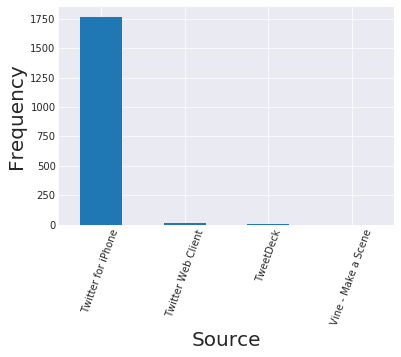

In [76]:
frequent_source.plot(kind='bar');
plt.xlabel('Source', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(rotation=70, fontsize=10);

**Twitter for iPhone** is the source with maximum frequency i.e, **1761**.

### 4. Which gender is most popular?

In [77]:
popular_gender = df_clean.gender.value_counts()
popular_gender

Male             1126
Female            405
Not mentioned     254
Name: gender, dtype: int64

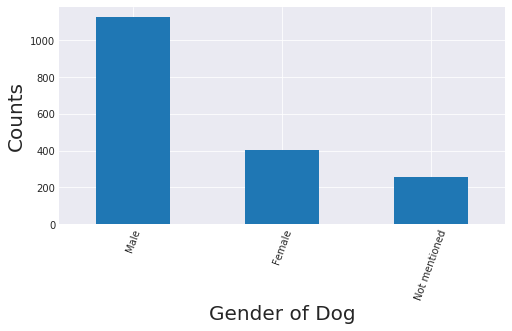

In [96]:
popular_gender.plot(kind='bar', figsize=[8,4])
plt.xlabel('Gender of Dog', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.xticks(rotation=70, fontsize=10);

**Male** dogs are more frequently adopted than the female dogs. 

### 5. Tweet IDs with highest ratings

In [79]:
x='tweet_id'
y='ratings'
max_rating_id=group_bymax(x, y)
max_rating_id

tweet_id
786709082849828864    7.500000
810984652412424192    3.428571
778027034220126208    2.700000
821407182352777218    1.400000
878057613040115712    1.400000
813812741911748608    1.400000
828650029636317184    1.400000
807621403335917568    1.400000
856282028240666624    1.400000
819004803107983360    1.400000
819015337530290176    1.400000
890240255349198849    1.400000
832273440279240704    1.400000
822462944365645825    1.400000
868880397819494401    1.400000
831911600680497154    1.400000
828381636999917570    1.400000
828770345708580865    1.300000
829011960981237760    1.300000
829374341691346946    1.300000
Name: ratings, dtype: float64

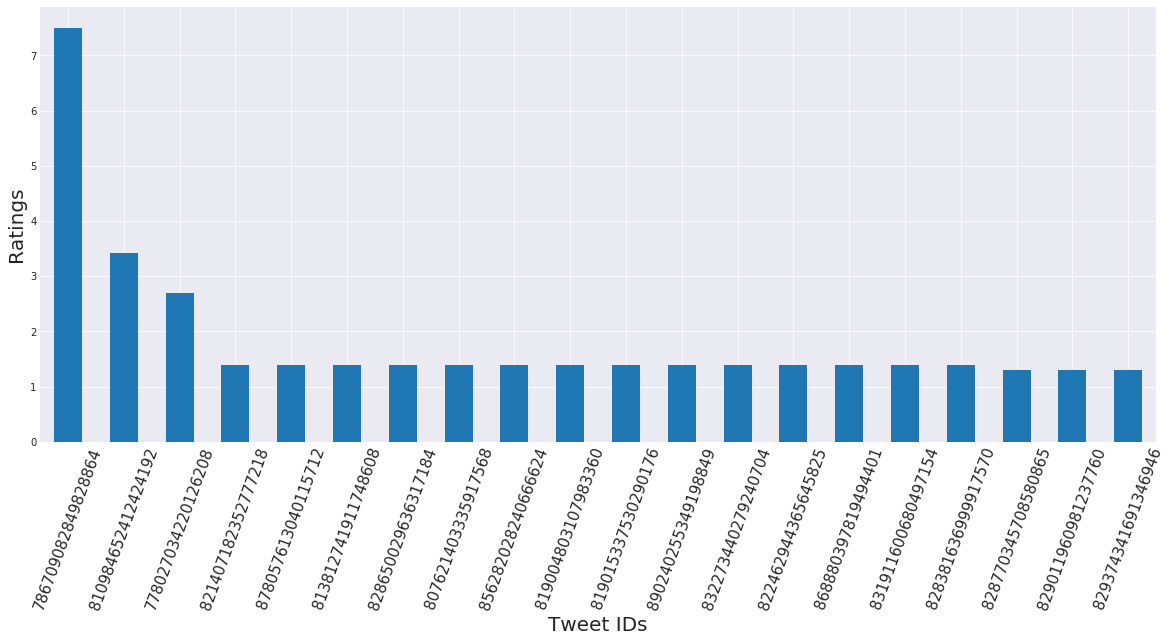

In [80]:
xlabel = 'Tweet IDs'
ylabel = 'Ratings'
graph(max_rating_id, xlabel, ylabel)

Tweet ID **786709082849828864** has the maximum rating value of **7.500000**.

### 6. Which breed is the most frequently adopted?

In [89]:
famous_breed = df_clean['breed'].value_counts()[:20]
famous_breed

golden retriever             195
Labrador retriever           116
Pembroke                     102
Chihuahua                     87
chow                          63
pug                           58
toy poodle                    52
French bulldog                41
Samoyed                       40
malamute                      39
Pomeranian                    36
cocker spaniel                34
Chesapeake Bay retriever      31
miniature pinscher            29
Cardigan                      29
Staffordshire bullterrier     28
Siberian husky                27
German shepherd               25
Eskimo dog                    21
Old English sheepdog          20
Name: breed, dtype: int64

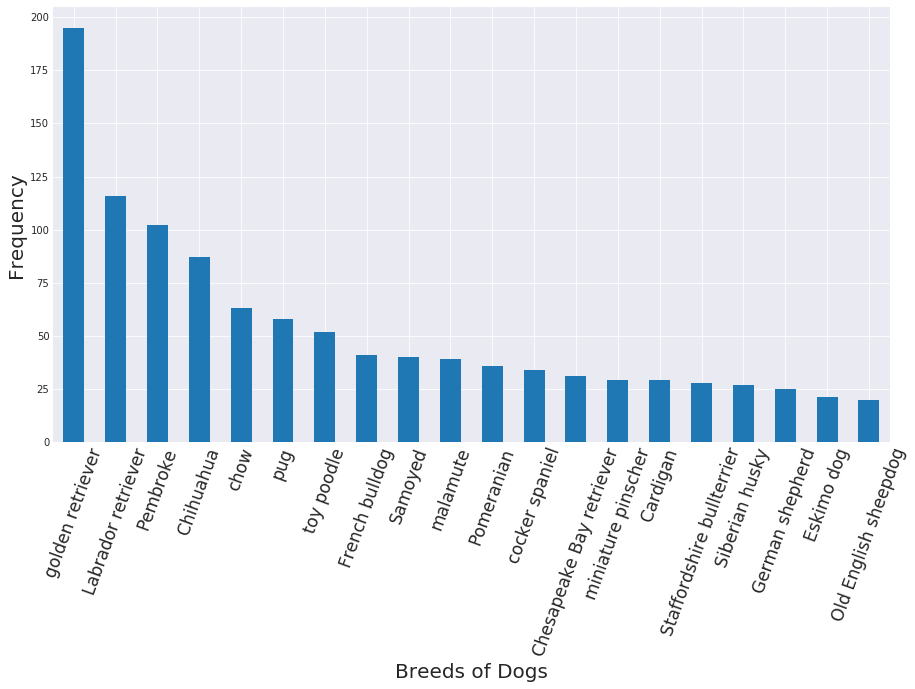

In [87]:
famous_breed.plot(kind='bar', figsize=[15,8])
plt.xlabel('Breeds of Dogs', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(rotation=70, fontsize=17);

**Golden Retriever** is the most adopted breed.

### 7. Which names do most people like to have for their dogs?

In [83]:
famous_names = df_clean['name'].value_counts()[:25]
famous_names

Tucker     16
Penny      15
Cooper     14
Lucy       14
Charlie    14
Bo         12
Oliver     11
Daisy      11
Winston    11
Rusty      10
Lola       10
Koda        9
Stanley     9
Dave        9
Toby        9
Scout       8
Leo         8
Sadie       8
Loki        8
Alfie       8
Jax         7
Bear        7
Oscar       7
Finn        7
Winnie      7
Name: name, dtype: int64

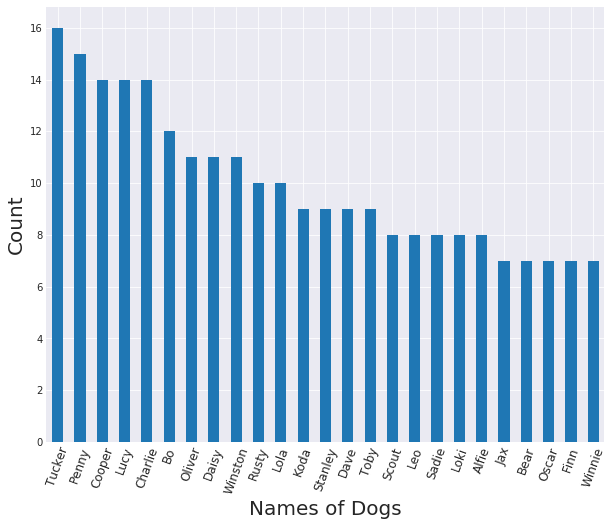

In [92]:
famous_names.plot(kind='bar', figsize=[10,8])
plt.xlabel('Names of Dogs', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.xticks(rotation=70, fontsize=12);

**Tucker, Penny, Charlie, Cooper, Lucy** are the top 5 names for the dogs.

### Storing

In [85]:
df_clean.to_csv('twitter_archive_master.csv', index=False)